# paper

# [Generative Adversarial Nets](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf)

**Ian J. Goodfellow∗
, Jean Pouget-Abadie†
, Mehdi Mirza, Bing Xu, David Warde-Farley,
Sherjil Ozair‡
, Aaron Courville, Yoshua Bengio§**

Departement d’informatique et de recherche op ´ erationnelle ´
Universite de Montr ´ eal ´
Montreal, QC H3C 3J7 



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.0.0


# 목차

---

### - 1. GAN 기본 개념
### - 2. Objective function 
### - 3. 학습과정
### - 4. Theoretical result

---

# 1 GAN 기본 개념

### 1.1 GAN은 생성모델을 만드는 프레임워크이다.

- 생성모델(G)과 분류모델(D)의 적대적 관계(adversarial process)를 이용한다.

- 생성모델(G)는 데이터 분포(data distribution)을 생성한다.

- 분류모델(D)는 샘플이 G로부터 왔는지, 데이터로부터 왔는지 분류한다. 

- G는 D의 실수를 maximize 하는 방향으로 학습하고, D는 실수를 minimize하도록 학습한다. (minmax game)

### 1.2 Counterfeiters and Police

논문에서 G는 위조범(Counterfeiters), D는 경찰(Police)로 비유하여 설명한다.

위조범은 경찰에게 걸리지 않고, 가짜를 만들기 위해 노력할 것이고, 경찰은 그 가짜를 구별하기 위해 노력할 것이다. 이 경쟁을 통해 둘다 그 일을 잘하게 될것이고, 위조범이 구별할 수 없는 가짜를 만들어 낼 때까지 계속될 것이다.


### 1.3 GAN의 구조

GAN 프레임워크는 다음과 같이 표현할 수 있다.

![GAN 구조](img/03.png)

먼저 z가 Generator를 통과(forward propagation)하며 sample을 만들어 낸다. 이때 논문에서는 z값을 random하게 만들어 사용하였다. 또한 sample의 크기는 학습 데이터(x)의 크기와 동일하다.

만들어진 sample과 데이터(x) Discriminator를 통과하여 분류된다.

Generator와 Discriminator는 둘다 multilayer perceptron 모델이다. 따라서 backkpropagation과 dropout 알고리즘으로 학습 될 수 있다.


# 2 Objective function
---
### 2.0 용어 정리
- $x$ : 데이터
- $z$ : Input noise
- $p$ : 분포(distribution)
    - $p_g(x) $ : x에 대한 g의 분포
    - $p_{data}(x) $ x의 분포
    - $p_z(z) $ 노이즈에 대한 분포


- $G$ : Generator,  $G(z;\theta_g)$ 
    - $ \theta_g $ : G의 파라미터
    
    
- $D$ : Discriminator, $D(x;\theta_d)$
     - $ \theta_d $ : D의 파라미터
---



### 2.1 Value function
$G(z;\theta_g)$의 결과는 공간 데이터가 나올 것이고, $D(x;\theta_d)$는 하나의 스칼라 값이 나올 것이다.

$D$는 판별을 잘하는 방향으로 학습해야 되므로, correct label(True, False)의 확률을 maximize 하는 방향이 될 것이고, $G$는 minimize 하는 방향으로 학습 될 것이다.

$D,G$ 에 대한 가치함수(value function) $V(G,D)$는 다음과 같다.


![value_function](img/01.png)

---

### 2.2 Value function 에 대한 유도

위의 value function을 보면 cross entropy 수식과 유사한 형태를 보인다. 따라서 위 value function을 보다 이해해 보고자, 기본적인 cross entropy로 부터 유도해 보았다.

- `Binary Cross entropy`는 다음과 같이 정리된다.<br>
$$ y log(\hat{y}) + (1-y)log(1-\hat{y})$$
    - $y$ : real label , 0 or 1
    - $\hat{y}$ : predict 값, [0,1]


위 식을 Discriminator에 적용하면, x가 들어간 경우와, G(z)가 들어간 경우 두가지로 나누어 볼 수 있다.

- **1) input : x 인 경우**

    - input 이 x 일때, $y=1$ 이고, $\hat{y} = D(x)$ 이다. 이 경우의 Cross entropy는 다음과 같다.
$$ log(D(x)) $$
    

- **2) input : G(z)인 경우**

    - input 이 G(z) 일때, $y=0$ 이고, $\hat{y} = D(G(z))$ 이므로 Cross entropy는 다음과 같다.
$$ log(1 - D( G(z) ) ) $$


1)과 2)를 합치면 위의 Value function의 오른쪽 수식이 나오게 된다.

---

### 2.3 Value function 으로 본 해석

**D의 입장**에서 생각해 볼 때, 잘 동작하는 D의 value function은 0 이 된다.
(D(x)=1, D(G(z)) = 0 이므로) 

반대로 잘 동작하지 못하는 D의 경우 value function은 -$\infty$ (D(x)=0, D(G(z))=1 )가 된다.

따라서 **D의 입장에서는 Value function을 maximize 하는 방향**으로 학습하여야 한다.

위와 마찬가지로 G의 입장에서 생각해볼 때, D를 잘 속이는 G는 D(G(z)) = 1 이 되어야 하므로 value funtion을 작게 만든다. 그러므로 **G는 value function을 minimize 하는 방향**이 되어야 한다.

따라서 $\min\limits_G \max\limits_D V(D,G) $ 로 표현 할 수 있다.

---

# 3 학습과정
### 3.1 학습 과정

논문에 있는, 학습과정을 잘 보여주는 이미지.

![Figure 1](img/02.png)
<center>논문의에 있는 figure 1 사진</center>

- (a) : 처음 시작할 때. $p_g$ 가 $p_{data}$와 전혀 다르게 생긴 것을 확인 할 수 있다.
- (b) : (a) 상태에서 $D$가 학습 하였을 때. $p_d$가 좀 더 smooth 하고 잘 구별하는 distribution이 만들어 진다.
- (c) : (b)에서 $G$가 학습 ($D$가 잘 구별하지 못하는 방향으로) 한 상태. $p_g$ 와 $p_{data}$ 가 좀더 가까워 진다.
- (d) : 위 과정을 반복한다면 최종적으로 $p_g$ = $p_{data}$ 가 되어 $D$가 둘을 전혀 구별하지 못하는 상태. 즉 $D(x) = \frac{1}{2}$ 이 된다.

학습을 할 때, $D$는 k-step 많큼 학습을 하고, $G$는 1-step 많큼 학습을 한다. 이는 inner loop에서 $D$가 완전히 학습되지 않고 optimal solution 근처에 있게 하고, 그로인해 $G$가 천천히 학습될 수 있게 하는 효과를 가진다.(논문에서는 k=1 을 사용했다고 한다.) 

또한 논문에서, 실전에서 G의 목적함수 $log(1-D(G(z))$를 minimize 하는 대신 $log(D(G(z))$를 maximize 하게 한다. 학습 초기에 기반 데이터가 다르므로 G는 빠르게 학습되지 못하고, D는 잘 학습되는 경향이 있다. 그로인해 G의 학습이 잘 되지 못하는데, $log(D(G(z))$를 사용하면 학습 초기에 더 강한 gradients를 발생 시킬 수 있어 위의 문제를 어느정도 방지 할 수 있다.


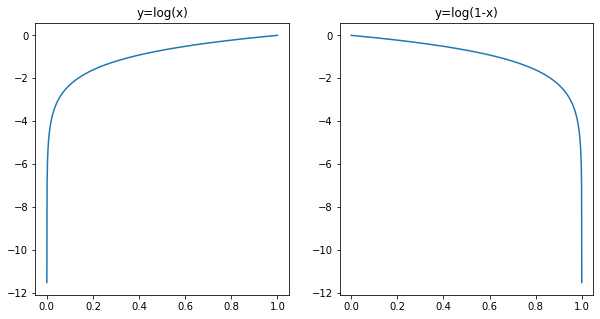

In [2]:
delta = 1e-5
x = np.linspace(0+delta,1-delta,1000)
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(x,np.log(x))
ax1.title.set_text('y=log(x)')

ax2 = fig.add_subplot(122)
ax2.plot(x,np.log(1-x))
ax2.title.set_text('y=log(1-x)')

plt.show()


---
위의 내용으로 학습과정을 정리하면 다음과 같이 정리 할 수 있다.
![gan_minibatch](img/04.png)
---

# 4. Theoretical Results

### 4.1 Global Optimality of $p_g = p_{data}$

Global Optimal 이 $p_g = p_{data}$ 임을 증명은 아래의 과정을 거친다.

1) G가 fixed 되어 있을 때, optimal D의 값을 찾는다.
$$D^*_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)} $$


2) 1에서 구한 D의 값으로, $V(G,D)$의 $\min\limits_G$값이 $p_g = p_{data}$ 일 때를 확인한다.
- 논문에서는 $p_g = p_{data}$ 를 가질 때, $V(G,D)=-log(4)$를 가지고, 이 값이 $min$값임을 보여 증명한다. 

---
    
![pg=pdata](img/06.png)

---



### 4.1.1) Proposition 1.

**a)** Value function을 전개 하면 다음과 같다.

![08](img/08.png)
<!-- $
\begin{align}
 \ V(G,D) &= \int_x p_{data}(x) logD(x)dx + \int_z p_z(z) log(1-D(g(z)))dz
\\        &= \int_x \Bigl( p_{data}(x) logD(x) + p_g(x)log(1-D(x)) \Bigl) dx
\end{align}
$ -->
 
**b)** 여기서 두번째 식은 $alog(y)+blog(1-y)$ 형태이다. 

$f(y) = alog(y) + b log(1-y)$에서 $a,b$가 0이 아닌 실수($(a,b) \in \mathbb R^2 \backslash \{0,0\}$ )이고, [0,1] 구간일 때, $ y=\frac{a}{a+b} $에서 최대값을 가진다.
    
이는 간단한 미분 계산이다. $alog(y) + b log(1-y)$는 convex(위로 볼록)한 형태를 가지므로, 미분값이 0인 곳이 max point 이다.

![09](img/09.png)
<!-- $
\begin{align}
 \ f(y)\prime &= \frac{1}{10} \bigl( \frac{a}{y} - \frac{b}{1-y} \bigl) = 0
 \\           &= \frac{a-(a+b)y}{y(1-y)} = 0
 \\ \therefore y = \frac{a}{a+b}
\end{align}
$ -->
    
**c)** b의 식을 a에 적용하면 
$$ D^*_G(x) = \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}$$

$Supp(p_{data}) \bigcup Supp(p_g)$ 이외의 범위는 논의 할 필요가 없다...

### 4.1.2) Theorem 1.
위에서 $D$가 maxmize 되었을 때의 값을 찾았으므로, 이번에는 $D$가 maximize 되었다($D^*$)고 생각하고 $\min\limits_G V(G,D^*)$일 때를 생각한다.

**a)** $C(G) = \max\limits_D V(G,D) = V(G,D^*)$ 라고 할 때, $C(G)$를 다시 전개하면

![10](img/10.png)
<!-- $\begin{align}
 \ C(G) &= \mathbb E_{x \sim p_{data}} [logD^*_G(x)] + \mathbb E_{z \sim p_z}[log(1-D^*_G(G(z)))]
\\      &= \mathbb E_{x \sim p_{data}} [logD^*_G(x) ] + \mathbb E_{x \sim p_g}[log(1-D^*_G(x))]
\\      &= \mathbb E_{x \sim p_{data}} [log \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}]
           + \mathbb E_{x \sim p_{g}}[log \frac{p_g(x)}{p_{data}(x)+p_g(x)}]
\end{align}$ -->
<br><br>

**b)** $p_g = p_{data}$ 일 때, C(G)의 값은 $-log(4)$ 를 가진다.

이를 이용하여 역으로 C(G)의 최소값이 $-log(4)$임을 보이면, $p_g = p_{data}$일 때가 최소점임을 알 수 있다.

![11](img/11.png)
<!-- $\begin{align}
 \ C(G)&=-log(4)+log(4)+C(G)
\\     &= -log(4) + log(4)+ \mathbb E_{x \sim p_{data}} [log \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}]
           + \mathbb E_{x \sim p_{g}}[log \frac{p_g(x)}{p_{data}(x)+p_g(x)}]
\\     &= -log(4) + \mathbb E_{x \sim p_{data}} [log \frac{p_{data}(x)}{p_{data}(x) + p_g(x)}] + log(2)
           + \mathbb E_{x \sim p_{g}}[log \frac{p_g(x)}{p_{data}(x)+p_g(x)}] +log(2)
\\     &= -log(4) + \mathbb E_{x \sim p_{data}} [log \frac{2p_{data}(x)}{p_{data}(x) + p_g(x)}]
           + \mathbb E_{x \sim p_{g}}[log \frac{2p_g(x)}{p_{data}(x)+p_g(x)}]
\\
\\     &= -log(4) + KL \Bigl( p_{data}|| \frac{p_{data} + p_g}{22} \Bigl) 
                 + KL \Bigl( p_{g}|| \frac{p_{data} + p_g}{22} \Bigl)
\\
\\     &= -log(4) + 2 JSD(p_{data} || p_q)
\end{align}$ -->

---

여기서 KL(Kullback_leibler divergence)에 대해 알아보면. 

[Wiki-en](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

- KL은 두 확률분포의 차이를 계산하는 데 사용하는 함수이다. 상대 엔트로피 등으로 불린다.

- $D_{KL}(P||Q) = H(P,Q) - H(P)$로 부터 유도할 수 있다. 여기서 $H$는 cross entropy를 뜻한다.

- 연속확률변수일 경우 $D_{KL}(P||Q) = \int_x p(x)log\frac{p(x)}{q(x)}dx$ 로 정의 된다. (p,q는 확률 밀도 함수)

- 비대칭으로, 두 값의 위치를 바꾸면 함수값도 달라진다. 따라서 이 함수는 거리 함수가 아니다.

- 항상 0 이상의 값을 가진다. (non-negative) 

마찬가지로 JSD(Jensen-Shannon Divergence)에 대해 잠깐 알아보면

- KL의 Unsymmetric 한 성질을 때문에 사용

- $JSD(P||Q) = \frac{1}{2} D_{KL} ( p|| \frac{p+q}{2} ) + \frac{1}{2} D_{KL} (q || \frac{p+q}{2})$ 로 정의 된다.

- $ 0 \leq JSD(P||Q) \leq 1$ 값을 가진다.

---

**c)** $C(G)$는 -log(4) 이상의 값을 가지므로, $p_g = p_{data}$ 일 때, global minimum 값을 가진다.

따라서 Generative model은 완벽하게 data distribution을 구현해 낼 수 있다.

---

## 4.2 Convergence of Algorithm 1

- G와 D가 학습할 것이 남은 상황에서, Algorithm1의 step을 따를때, 학습된 G와 p_g가 D를 optimium 값으로 유도 할 수 있다. 라는 것에 대한 증명.

- 교차학습하는 것이 optimum으로 이끌 수 있는가의 증명?

---

![Convergence of algorithm](img/07.png)

---

step에서 충분히 학습된 $p_g$에 대한 $V(G,D)$를 $U(p_g,D)$라고 할 때, $U(p_g,D)$ 역시 convex하다. 

`The subderivatives of a supremum of convex functions include the derivative of the function at the point where the maximum is attained`

볼록함수에서, supremum에 있는 subderivatives는 maximum에 도달한 derivative를 포함한다. 그러므로 몇번의 업데이트를 통해서 $p_g = p_{data}$로 수렴 할 수 있다.


---

실제로는, $p_g$ 대신 $\theta_g$를 학습 시키는 것이므로, 이론과 정확히 일치 하지 않는 허점이 있다. 하지만 실제 실험에서 좋은 성능을 내는것으로 보아, 이론적인 허점이 있음에도 불구하고 충분히 함리적인 모델이라고 말하고 있다.


---

# Code

###### 안된다 너무 슬프다.

## 1. Data

### MNIST data set

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


(60000, 28, 28)
(6131, 28, 28)


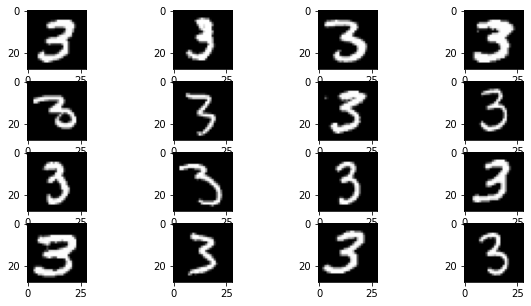

In [4]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
print(train_images.shape)

learn_label = 3
train_images = train_images[train_labels==learn_label]
print(train_images.shape)

fig = plt.figure(figsize=(10,5))
for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(train_images[i],cmap='gray')
plt.show()

In [5]:
train_images = (train_images-127.5)/127.5

### create noise

In [6]:
def create_noise(batch_size, noise_dim):
    return np.random.uniform(low=-1, high=1, size=(batch_size, noise_dim))
#     return np.random.normal(size=(batch_size, noise_dim))

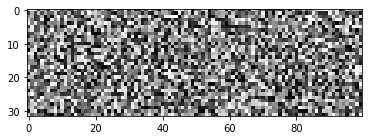

In [7]:
noise = create_noise(32,100)
plt.imshow(noise,cmap= 'gray')
plt.show()

## 2. Model

### Fully connected layer

In [8]:
def Xavier(size):
    return np.random.normal(size = size, scale = np.sqrt(2/(np.sum(size))))

class DNN:
    def __init__(self, size, **kwargs):
        
        self.size = size
        
        self.w = Xavier(size)
        self.b = np.zeros(size[-1])
        
        # for backward
        self.cache = None
        
        # for sgd_momentum
        self.w_config = {'v': np.zeros_like(self.w)}
        self.b_config = {'v': np.zeros_like(self.b)}
        for config in [self.w_config, self.b_config]:
            config['lr'] = kwargs.get('lr', 1e-3)
            config['m'] = kwargs.get('m', 0.9)
        
        
    def __str__(self):
        return "{size} size fully connect layer".format(size=self.size)
        
    def forward(self,x):
        out = x.reshape(x.shape[0], -1).dot(self.w) + self.b
        self.cache = x
        return out
        
    def backward(self, dout):
        x = self.cache
        w = self.w
        b = self.b
        
        dx = dout.dot(w.T).reshape(x.shape)
        dw = x.reshape(x.shape[0], -1).T.dot(dout)
        db = np.sum(dout, axis=0)
        
        return dx, dw, db    
        
    def momentum_update(self,dw,db):
        
        self.w_config['v'] = self.w_config['m'] * self.w_config['v'] - self.w_config['lr'] * dw
        self.w = self.w + self.w_config['v']
        
        self.b_config['v'] = self.b_config['m'] * self.b_config['v'] - self.b_config['lr'] * db
        self.b = self.b + self.b_config['v']
              

In [9]:
BATCH_SIZE = 3
NOISE_DIM = 5
HIDDEN_SIZE = 4

d = DNN((NOISE_DIM,HIDDEN_SIZE))
noise = create_noise(BATCH_SIZE, NOISE_DIM)
out = d.forward(noise)
print('forward output shape :',out.shape)

dout = create_noise(BATCH_SIZE,HIDDEN_SIZE)
dout, dw, db = d.backward(dout)
print('backward output shape :',dout.shape, dw.shape, db.shape)

forward output shape : (3, 4)
backward output shape : (3, 5) (5, 4) (4,)


### RELU, SIGMOID

In [10]:
class RELU:
    def __init__(self):
        self.cache = None
        
    def forward(self,x):
        out = np.maximum(0,x)
        self.cache = x
        return out
    
    def backward(self, dout):
        x = self.cache
        dx = np.where(x>0, dout, 0)
        return dx
        
class SIGMOID:
    def __init__(self):
        self.cache = None
    
    def forward(self, x):
        out = 1/(1+np.exp(-x))
        self.cache = out
        return out
    
    def backward(self, dout):
        out = self.cache
        return out*(1-out)*dout

In [11]:
re = RELU()
out = np.linspace(-5,5,num=12).reshape(3,4)
re_out = re.forward(out)
print('out')
print(out)
print('relu_out')
print(re_out)
print()

dout = create_noise(3,4)
re_dout = re.backward(dout)
print(dout)
print(re_dout)


out
[[-5.         -4.09090909 -3.18181818 -2.27272727]
 [-1.36363636 -0.45454545  0.45454545  1.36363636]
 [ 2.27272727  3.18181818  4.09090909  5.        ]]
relu_out
[[0.         0.         0.         0.        ]
 [0.         0.         0.45454545 1.36363636]
 [2.27272727 3.18181818 4.09090909 5.        ]]

[[-0.14162187  0.25871128 -0.15342149 -0.47483014]
 [-0.65898086 -0.6648865   0.71679597 -0.19581201]
 [ 0.13852886 -0.36390803 -0.31059965  0.28898069]]
[[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.71679597 -0.19581201]
 [ 0.13852886 -0.36390803 -0.31059965  0.28898069]]


## Dropout

In [12]:
class DROPOUT:
    def __init__(self,p=0.5):
        self.p = p
        self.mask = None
        
    def forward(self,x, train=True):

        p = self.p
        mask = None
        out = None
        
        if train:
            mask = (np.random.rand(*x.shape) <p)/p
            out = mask*x
            
        else:
            out = x
            
        self.mask = mask
        return out.astype(x.dtype, copy=False)
    
    def backward(self,dout,train=True):
        
        mask = self.mask
        if train:
            dx = mask * dout
        else:
            dx = dout
        return dx

## G,D

In [13]:
class Generator:
    def __init__(self,noise_size,output_size):
        self.d1 = DNN((noise_size,output_size//4))
        self.re1 = RELU()
        self.d2 = DNN((output_size//4,output_size))
        
    def forward(self,x):
        out = self.d1.forward(x)
        out = self.re1.forward(out)
        out = self.d2.forward(out)
        return out
    
    def backward(self,dout,train=True):
        
        dout, dw2, db2 = self.d2.backward(dout)
        dout = self.re1.backward(dout)
        dout, dw1, db1 = self.d1.backward(dout)
        
        if train:
            self.d2.momentum_update(dw2,db2)
            self.d1.momentum_update(dw1,db1)
        
class Discriminator:
    def __init__(self, x_size):
        self.d1 = DNN((x_size,256))
        self.dr1 = DROPOUT()
        self.re1 = RELU()
        self.d2 = DNN((256, 128))
        self.dr2 = DROPOUT()
        self.re2 = RELU()
        self.d3 = DNN((128,1))
        self.sig3 = SIGMOID()
        
    def forward(self,x, train=True):
        out = self.d1.forward(x)
        out = self.dr1.forward(out,train=train)
        out = self.re1.forward(out)
        out = self.d2.forward(out)
        out = self.dr2.forward(out,train=train)
        out = self.re2.forward(out)
        out = self.d3.forward(out)
        out = self.sig3.forward(out)
        return out

    def backward(self,dout, train=True):

        dout = self.sig3.backward(dout)
        dout,dw3,db3 = self.d3.backward(dout)
        dout = self.re2.backward(dout)
        dout = self.dr2.backward(dout,train)
        dout,dw2,db2 = self.d2.backward(dout)
        dout = self.re1.backward(dout)
        dout = self.dr1.backward(dout,train)
        dout,dw1,db1 = self.d1.backward(dout)
        
        if train:
            self.d3.momentum_update(dw3,db3)
            self.d2.momentum_update(dw2,db2)
            self.d1.momentum_update(dw1,db1)
        
        return dout

In [14]:
def binary_cross_entropy_loss(x, y):
    loss = -np.mean(y*np.log(x) + (1-y)*np.log(1-x))    
    dx = -y/(x+1e-8) + (1-y)/(1-x+1e-8)
    return loss, dx

def G_loss(fake_output):
    loss = np.mean(-np.log(fake_output))
    grad = -1./(fake_output+1e-8)
    return loss, grad

def D_loss(real_output, fake_output):
    # max_D_loss = log(R) + log(1-F)
    # min_D_loss = - log(R)  -log(1-F)
    # deriva ... = - 1/R + 1/(1-F)
    loss = np.mean(-np.log(real_output) - np.log(1-fake_output))
    grad = -1./(real_output+1e-8) + 1./(1-fake_output+1e-8)
    return loss, grad
    

0 done 1.7051512465457306 0.4850822076824101


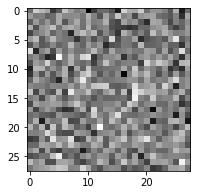

1 done 1.474646203585229 0.5978702959594767
2 done 1.4180778094946755 0.6485555294514609
3 done 1.3934045784139557 0.6662889153493299
4 done 1.3961741413854094 0.6635274558458787
5 done 1.3690503512153436 0.6832853496799461
6 done 1.3776947740582404 0.6760505370358553
7 done 1.378011032330947 0.6798496163206418
8 done 1.4012768109127154 0.6671406538835498
9 done 1.3799970942627713 0.6796018021791445
10 done 1.3770828827990431 0.6785321489794329
11 done 1.3862878892638282 0.6749596156234008
12 done 1.407706685257415 0.6623865273425623
13 done 1.3941293067392424 0.6701526585033986
14 done 1.3942373771264729 0.6720774985842044
15 done 1.3949816690603203 0.6696449502012505
16 done 1.3862328142716376 0.6743727649460718
17 done 1.394764389039136 0.6702625368015599
18 done 1.3908945159536013 0.6713552432589776
19 done 1.3715488938510516 0.6811075145486785
20 done 1.376318494789695 0.6793873162551028
21 done 1.3786873306714196 0.6791663626108116
22 done 1.3835758792266544 0.6772672173142864
23

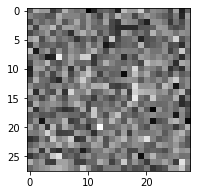

101 done 1.3994081899473039 0.6709720921878285
102 done 1.4034056715898098 0.6703691835740008
103 done 1.4002040775718128 0.6724136057011232
104 done 1.3982046287664547 0.6707001483961699
105 done 1.3946253445870702 0.6760814791032357
106 done 1.4082783859109251 0.6667788740080645
107 done 1.4069614846215928 0.6680131842165953
108 done 1.417401716573944 0.6649616674569739
109 done 1.4136045694086814 0.6626720113353154
110 done 1.4093148196574594 0.6682711829376631
111 done 1.402139102782311 0.6701352547777568
112 done 1.4041617669984032 0.670357930931167
113 done 1.4048685512731633 0.6688636262399198
114 done 1.4035049983339656 0.6699218518022357
115 done 1.400400186033716 0.6719540223852902
116 done 1.4043099369083631 0.6698242453511952
117 done 1.3997063203651003 0.6716886243294405
118 done 1.401192378619215 0.6712137198195746
119 done 1.4056261794222271 0.6689726670310172
120 done 1.4039214573607646 0.6700214447572589
121 done 1.4034332864835242 0.6704589637953637
122 done 1.4087214

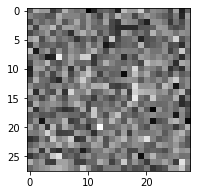

201 done 1.3948245192300694 0.6779967892598137
202 done 1.390305847977817 0.6775770789459978
203 done 1.3869644721294743 0.6809878620967299
204 done 1.3903377557014964 0.6768113330660145
205 done 1.389831319675239 0.6783208588085953
206 done 1.3865013769911996 0.6807948879456491
207 done 1.3913174149423322 0.6776422065760919
208 done 1.388266741997569 0.6800356227507489
209 done 1.3923734423936343 0.6787612956966439
210 done 1.393377639716732 0.6773660683150878
211 done 1.389406474688002 0.6765009587385405
212 done 1.3890225021698113 0.6800605187076626
213 done 1.3867330667791153 0.6806607703700516
214 done 1.3858653736445818 0.6813177629705891
215 done 1.3883352637613837 0.6786191998199673
216 done 1.3973082878218215 0.6761073048041386
217 done 1.3932957809598747 0.675092288962978
218 done 1.3993093746734988 0.6744946144952684
219 done 1.3974041653300238 0.6754851034845571
220 done 1.401283500942139 0.6731395435390007
221 done 1.3964130025604662 0.6738508066950646
222 done 1.396976470

KeyboardInterrupt: 

In [17]:
BATCH_SIZE = 64
NOISE_DIM = 100
IMG_SIZE = 28*28
EPOCHS = 500

G = Generator(noise_size = NOISE_DIM, output_size = IMG_SIZE)
D = Discriminator(x_size = IMG_SIZE)

# 
batch_iters=train_images.shape[0]//BATCH_SIZE

# visualizing noise
np.random.seed(7777)
testing_noise = create_noise(1,100)

D_loss_history=[]
G_loss_history=[]
for epoch in range(EPOCHS):
    g_losses = 0
    d_losses = 0
    for batch_iter in range(batch_iters):        
        ## D train
        # generate fake image
        noises = create_noise(BATCH_SIZE,NOISE_DIM)
        fake_img = G.forward(noises)

        # prepare real image
        real_img = train_images[batch_iter*BATCH_SIZE:(batch_iter+1)*BATCH_SIZE]

        #forward
        real_output = D.forward(real_img)
        fake_output = D.forward(fake_img)

        # loss, gradient
        d_loss, d_grad = D_loss(real_output, fake_output)
        
        # train
        D.backward(d_grad,train=True)
        

        ## G train
        noises = create_noise(BATCH_SIZE,NOISE_DIM)
        fake_img = G.forward(noises)
        fake_output = D.forward(fake_img,train=False)
        
        g_loss, g_grad = G_loss(fake_output)
        
        dout = D.backward(g_grad, train=False)
        G.backward(dout,train=True)
        
        g_losses += g_loss
        d_losses += d_loss
        
    # loss history
    D_loss_history.append(d_losses/batch_iters)
    G_loss_history.append(g_losses/batch_iters)
    
    
    print(epoch,'done',D_loss_history[-1], G_loss_history[-1])
    # 
    if epoch%100 == 0:
        t_img = G.forward(testing_noise).reshape(28,28)
        plt.figure(figsize=(3,3))
        plt.imshow(t_img, cmap='gray')
        plt.show()

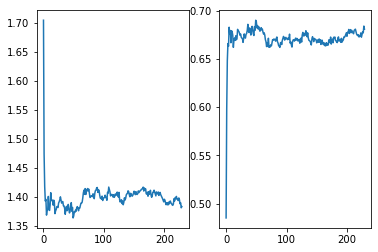

In [18]:
plt.subplot(1,2,1)
plt.plot(D_loss_history)

plt.subplot(1,2,2)
plt.plot(G_loss_history)

plt.show()

# Ref


https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

https://ko.wikipedia.org/wiki/%EC%BF%A8%EB%B0%B1-%EB%9D%BC%EC%9D%B4%EB%B8%94%EB%9F%AC_%EB%B0%9C%EC%82%B0

https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence

https://hyeongminlee.github.io/post/prob002_kld_jsd/